In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: April 2025
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Beta-Binomial Conjugate

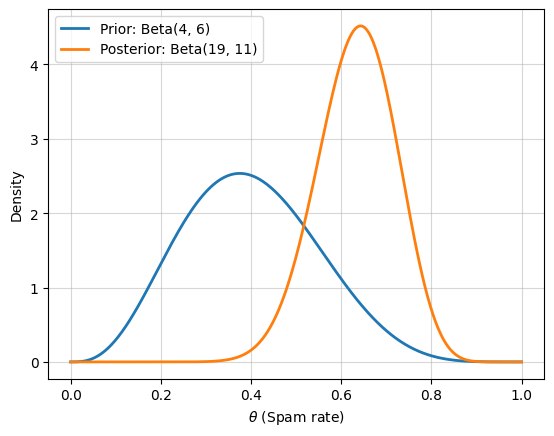

In [3]:
from scipy.stats import beta

# Parameters for prior and posterior
alpha_prior, beta_prior = 4, 6   # Prior Beta(4, 6)
n, x = 20, 15                    # Observations
alpha_post = alpha_prior + x
beta_post = beta_prior + n - x

# Theta range
theta = np.linspace(0, 1, 500)

# Prior, likelihood (scaled), and posterior densities
prior_pdf = beta.pdf(theta, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(theta, alpha_post, beta_post)

# Plot
plt.plot(theta, prior_pdf, label=r'Prior: Beta(4, 6)', lw=2)
plt.plot(theta, posterior_pdf, label=r'Posterior: Beta(19, 11)', lw=2)

plt.xlabel(r'$\theta$ (Spam rate)')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('figures/beta_binomial_conjugate.pdf')